In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
train_data = pd.read_csv("C:/Users/Geo/Downloads/New folder (26)/train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
display(train_data.head())
print(train_data.shape)


test_data = pd.read_csv("C:/Users/Geo/Downloads/New folder (26)/test_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
print(display(test_data.head()))
print(test_data.shape)

test_solution_data = pd.read_csv("C:/Users/Geo/Downloads/New folder (26)/test_data_solution.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
print(display(test_solution_data.head()))
print(test_solution_data.shape)

<ipython-input-2-f32bb881be40>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv("C:/Users/Jerry/Downloads/New folder (26)/train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


(54214, 4)


<ipython-input-2-f32bb881be40>:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv("C:/Users/Jerry/Downloads/New folder (26)/test_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papÃ¡ (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


None
(54200, 4)


<ipython-input-2-f32bb881be40>:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_solution_data = pd.read_csv("C:/Users/Jerry/Downloads/New folder (26)/test_data_solution.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papÃ¡ (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


None
(54200, 4)


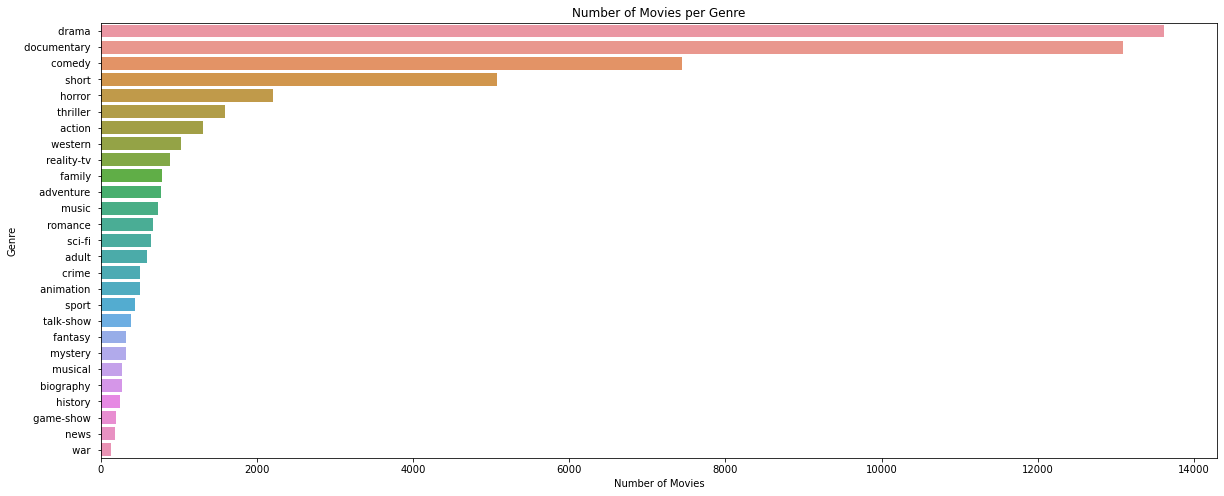

In [3]:
plt.figure(figsize=(20,8))
sns.countplot(y=train_data['GENRE'], order = train_data['GENRE'].value_counts().index)
plt.title('Number of Movies per Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

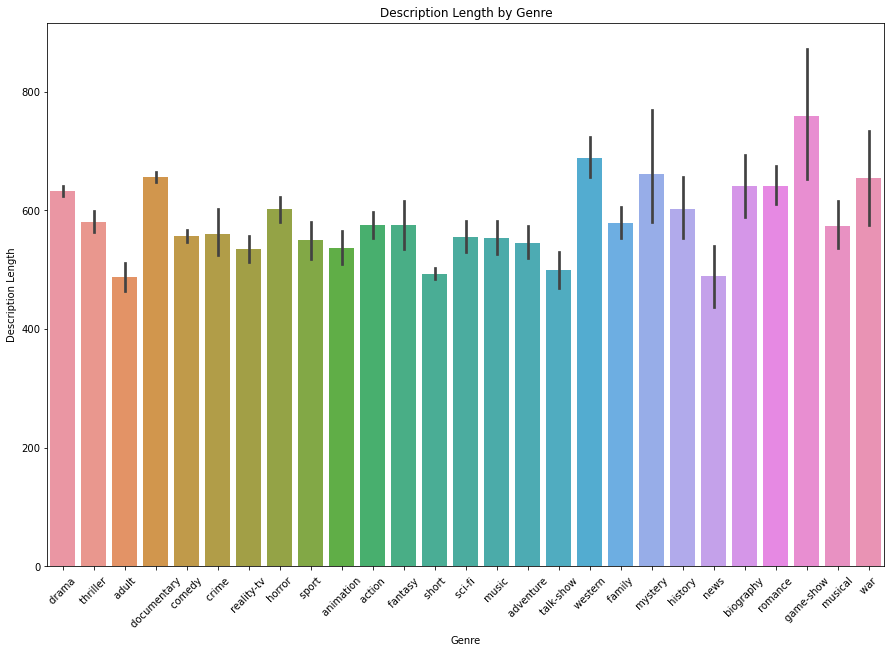

In [4]:
train_data['DESCRIPTION_length'] = train_data['DESCRIPTION'].apply(len)
plt.figure(figsize=(15, 10))
sns.barplot(x='GENRE', y='DESCRIPTION_length', data=train_data)
plt.title('Description Length by Genre')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Description Length')
plt.show()

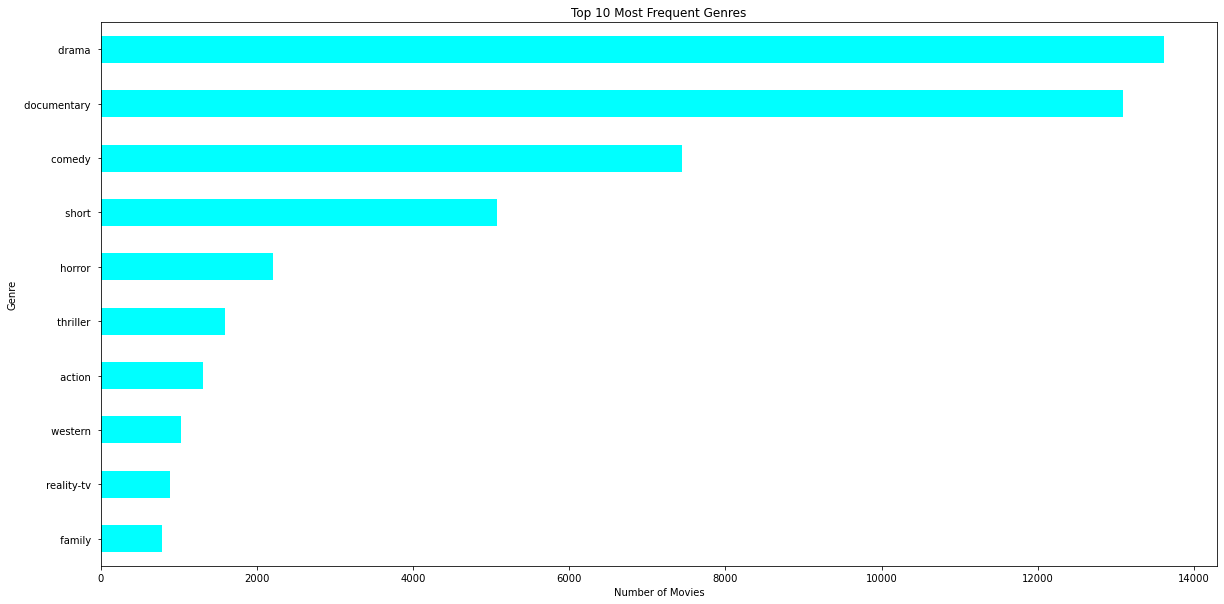

In [5]:
top_genres = train_data['GENRE'].value_counts().head(10)

plt.figure(figsize=(20, 10))
top_genres.plot(kind='barh', color='cyan')
plt.title('Top 10 Most Frequent Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.gca().invert_yaxis()  # Invert y-axis to have the genre with the most movies at the top
plt.show()

In [6]:

# Handle any potential missing values
train_data['DESCRIPTION'].fillna("", inplace=True)
test_data['DESCRIPTION'].fillna("", inplace=True)

t_v = TfidfVectorizer(stop_words='english', max_features=100000)
X_train = t_v.fit_transform(train_data['DESCRIPTION'])
X_test = t_v.transform(test_data['DESCRIPTION'])

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['GENRE'])
y_test = label_encoder.transform(test_solution_data['GENRE'])

In [7]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

clf = LinearSVC()
clf.fit(X_train_sub, y_train_sub)

y_val_pred = clf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

Validation Accuracy: 0.5836945494789265
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.32      0.37       263
           1       0.73      0.42      0.53       112
           2       0.45      0.21      0.28       139
           3       0.41      0.13      0.20       104
           4       0.00      0.00      0.00        61
           5       0.53      0.59      0.56      1443
           6       0.39      0.07      0.11       107
           7       0.69      0.82      0.75      2659
           8       0.56      0.72      0.63      2697
           9       0.34      0.17      0.22       150
          10       0.08      0.01      0.02        74
          11       0.82      0.68      0.74        40
          12       0.00      0.00      0.00        45
          13       0.66      0.67      0.66       431
          14       0.62      0.57      0.59       144
          15       0.25      0.04      0.07        50
      

In [8]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(max_iter=500)
lr_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [9]:
from sklearn.metrics import accuracy_score, classification_report

# Assuming your final Logistic Regression classifier is lr_classifier
# Predict the test set results
y_pred_lr = lr_classifier.predict(X_test)


In [10]:
# Calculate the accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)


Logistic Regression Accuracy: 0.2511439114391144


In [11]:
# Print the classification report
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

C:\Users\Jerry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jerry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1314
           1       0.00      0.00      0.00       590
           2       0.00      0.00      0.00       775
           3       0.00      0.00      0.00       498
           4       0.00      0.00      0.00       264
           5       0.00      0.00      0.00      7446
           6       0.00      0.00      0.00       505
           7       0.00      0.00      0.00     13096
           8       0.25      1.00      0.40     13612
           9       0.00      0.00      0.00       783
          10       0.00      0.00      0.00       322
          11       0.00      0.00      0.00       193
          12       0.00      0.00      0.00       243
          13       0.00      0.00      0.00      2204
          14       0.00      0.00      0.00       731
          15       0.00      0.00      0.00       276
          16       0.00      0.00    

C:\Users\Jerry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
# Displaying a few test outputs
# Create a DataFrame to compare actual and predicted genres
results_df = pd.DataFrame({'Actual Genre': y_test, 'Predicted Genre': y_pred_lr})
print(results_df.head(10))  # Display first 10 results

   Actual Genre  Predicted Genre
0            24                8
1             5                8
2             7                8
3             8                8
4             8                8
5            13                8
6             8                8
7             5                8
8             7                8
9             8                8


In [18]:
!pip install googletrans

  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15734 sha256=e0df76433105d2c849cccff93266c9475f38014fa6044b354efd5fd7173c7a64
  Stored in directory: c:\users\jerry\appdata\local\pip\cache\wheels\0e\ce\9b\d51de1064911d42480ab6b57fc943ee36572441f27546354e2
Successfully built googletrans


In [19]:
!pip install langdetect

  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=6b67174064e9a184366e2eadee65c096d329e8b269e960f3c01ca575248e6785
  Stored in directory: c:\users\jerry\appdata\local\pip\cache\wheels\13\c7\b0\79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect


In [20]:
!pip install pycountry
import pycountry

  Attempting uninstall: importlib-resources
    Found existing installation: importlib-resources 5.7.1
    Uninstalling importlib-resources-5.7.1:
      Successfully uninstalled importlib-resources-5.7.1


In [21]:
from time import time
import re
import string
import nltk
from googletrans import Translator
from langdetect import detect
import pycountry
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import *
import warnings
warnings.filterwarnings('ignore')

In [28]:
train=train_data

In [23]:
test=test_data

In [27]:
test.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",
1,2,La guerra de papÃ¡ (1977),"Spain, March 1964: Quico is a very naughty ch...",
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,


In [31]:
train.loc[train['DESCRIPTION'].str.contains(r'@\S+')].head()

,ID,TITLE,GENRE,DESCRIPTION,DESCRIPTION_length
242,243,TÃºlvilÃ¡gi beszÃ©lÃ¶ (1992),documentary,Mail <svaradi@sprynet.com> for translation. T...,879
1880,1881,Rokonok (1954),drama,Mail <svaradi@sprynet.com> for translation. F...,362
1986,1987,Lila akÃ¡c (1934),comedy,Mail <svaradi@sprynet.com> for translation. S...,187
6579,6580,A csÃºnya lÃ¡ny (1935),comedy,Mail <svaradi@sprynet.com> for translation. D...,327
8296,8297,FÃ¼szer Ã©s csemege (1940),drama,Mail <svaradi@sprynet.com> for translation. 5...,293


In [30]:
train.head()

,ID,TITLE,GENRE,DESCRIPTION,DESCRIPTION_length
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625


In [32]:
def detect_language(text):
    try:
        #Returning the name 'English instide of en'
        return pycountry.languages.get(alpha_2=detect(text)).name.lower()
    except:
        return 'Unknown'
train['Language'] = train['DESCRIPTION'].apply(detect_language)
test['Language'] = test['DESCRIPTION'].apply(detect_language)
train.head()
     

,ID,TITLE,GENRE,DESCRIPTION,DESCRIPTION_length,Language
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,english
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,english
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,english
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,english
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,english


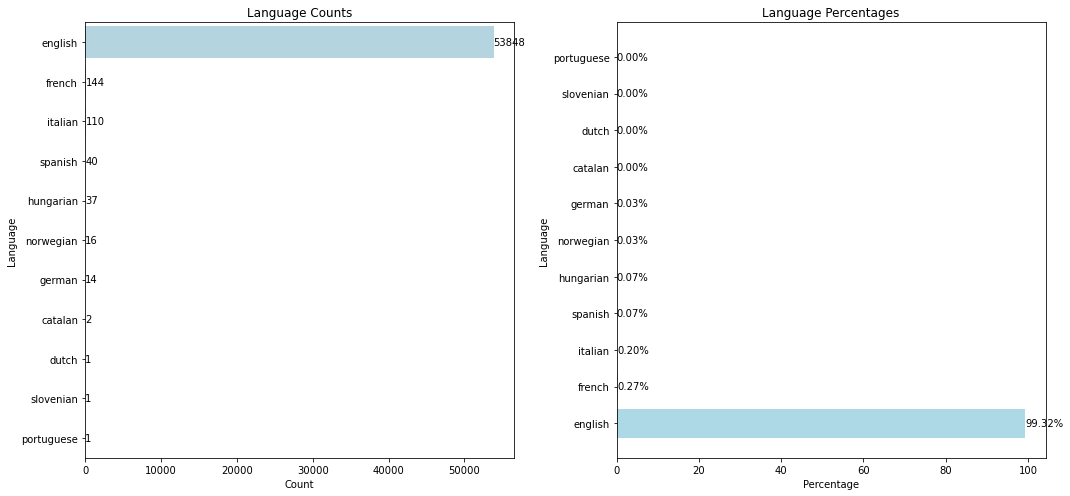

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Bar plot for language counts
sns.countplot(data=train, y='Language', order=train['Language'].value_counts().index, ax=axs[0], color='lightblue')
axs[0].set_title('Language Counts')
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Language')

# Add count labels to the bars manually
for p in axs[0].patches:
    axs[0].annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')

# Calculate the percentage of each language
language_counts = train['Language'].value_counts()
language_percentages = (language_counts / language_counts.sum()) * 100

# Bar plot for language percentages
axs[1].barh(language_percentages.index, language_percentages, color='lightblue')
axs[1].set_title('Language Percentages')
axs[1].set_xlabel('Percentage')
axs[1].set_ylabel('Language')

# Add percentage labels to the bars manually
for i, (index, value) in enumerate(language_percentages.items()):
    axs[1].annotate(f'{value:.2f}%', (value, i), ha='left', va='center')

# Show the plot
plt.tight_layout()
plt.show()

In [37]:
def clean_text(text):
    # Remove strange pattern in different languages if exist
    text = re.sub('Mail  for translation. ','',text)
    # Remove twitter handles
    text = re.sub(r'@\S+', '', text)
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove punctuations
    text = re.sub(f'[{string.punctuation}]','',text)
    # Remove numbers
    text = re.sub(f'[{string.digits}]','',text)
    # Remove single charachters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    return text


In [38]:
train['DESCRIPTION'] = train['DESCRIPTION'].apply(clean_text)
test['DESCRIPTION'] = test['DESCRIPTION'].apply(clean_text)

In [39]:
train[~train.Language.isin(['english'])]

,ID,TITLE,GENRE,DESCRIPTION,DESCRIPTION_length,Language
210,211,Divorzio alla siciliana (1963),comedy,Il barone FifÄ› ha bisogno di un erede per av...,652,italian
242,243,TÃºlvilÃ¡gi beszÃ©lÃ¶ (1992),documentary,Mail svaradi for translation Tollas Tibor az ...,879,hungarian
282,283,"""Boogie-woogie 47"" (1980)",drama,En plusieurs familles de MontrÃ©al passent l...,682,french
806,807,Iszony (1965),drama,Mail to author for translation Karasz Nelli a...,400,hungarian
837,838,Entretien avec Anne Claire Poirier (2005),biography,Long mÃ©trage documentaire qui explore la car...,362,french
...,...,...,...,...,...,...
53697,53698,Fantasmi e ladri (1959),comedy,Annunziata ha letto diecimila gialli spopola ...,990,italian
53712,53713,Due notti con Cleopatra (1954),comedy,Cleopatra Ä� una donna bellissima ma ha un pi...,573,italian
53878,53879,Gyilkos kedv (1997),drama,Kora delutan egy iskolabol hazatero kislany c...,413,hungarian
54165,54166,Az Ã¡ldozat (1994),documentary,Mail author for translation Az os forradalom ...,689,hungarian
